In [2]:
import numpy as np 

The objective of this course is to ensure you are able to:
 Learn Basics of Numpy Introduction to Numpy
- 1D array
   - zeros(), ones()
   - linspace(), arange(), .array(),
   - random.randint(), random.normal(),
   - random.uniform()
   - indexing, Slicing
   - .any() vs all()
   - broadcasting
- 2D array
    - Introduction
    - reshape()
    - flatten() vs ravel()
    - indexing and slicing
    - axis = 1 vs axis = 0
   - dot product
- cross product
- linalg module
- 3D array and images

## 1D Array 

In [3]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [9]:
b = np.zeros(2)
b 

array([0., 0.])

In [10]:
b = np.zeros_like(b)
b

array([0., 0.])

In [12]:
c = np.ones(5)
c

array([1., 1., 1., 1., 1.])

In [14]:
#linspace(), arange(), .array()
a1 = np.array([1, 2, 3])
a1

array([1, 2, 3])

# linspace -> values spaced linearly in specified interval 
help(np.linspace)
    
    linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.

In [21]:
np.linspace(start=0, stop=10, num=5) #num is number of values needed

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [25]:
np.linspace(start=0, stop=1, num=4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

### arange 

arange(...) 
    Return evenly spaced values within a given interval.
    
    ``arange`` can be called with a varying number of positional arguments:
    
    * ``arange(stop)``: Values are generated within the half-open interval
      ``[0, stop)`` (in other words, the interval including `start` but
      excluding `stop`).
    * ``arange(start, stop)``: Values are generated within the half-open
      interval ``[start, stop)``.
    * ``arange(start, stop, step)`` Values are generated within the half-open
      interval ``[start, stop)``, with spacing between values given by
      ``step``.

In [29]:
# first number, last number, and the step size.
np.arange(2,4,2), np.arange(0,1,0.05)

(array([2]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]))

In [32]:
len(np.arange(1,10,0.01))

900

In [42]:
# random.randint(), random.normal() 
# random generator class
print(np.random.default_rng())
np.random.default_rng().random((7)), np.random.default_rng().random(7)

Generator(PCG64)


(array([0.87304617, 0.31794839, 0.61163926, 0.04918844, 0.8678995 ,
        0.80223582, 0.14723488]),
 array([0.05076629, 0.81352753, 0.61402907, 0.53898445, 0.40761619,
        0.13924722, 0.81714573]))

In [43]:
a = np.array([11, 11, 12, 13, 14, 15, 16, 17, 12, 13, 11, 14, 18, 19, 20])
np.unique(a) 

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [61]:
# random.randint(low, high=None, size=None, dtype=int)
random1 = np.random.randint(low=0, high=100, size = (3,2), dtype = np.int8)
# itemsize is memory size of each element 
print(random1.itemsize)
print(random1.size)
print(random1.itemsize*random1.size)

# int32 has 4 bytes for each element 
random2 = np.random.randint(low=0, high=100, size = (3,2), dtype = np.int32)
print(random2.itemsize * random2.size)

# int128 
random3 = np.random.randint(low=0, high=100, size = (3,2), dtype = np.int64)
random3.itemsize * random3.size 

1
6
6
24


48

In [107]:
# random.normal(loc=0.0, scale=1.0, size=None)
# random samples from a normal (Gaussian distribution) 
# loc = mean (centre) of the distribution  
# scale = standard deviation (width) of the distribution 
# size = output shape , (m,n,k) -> m*n*k samples are drawn 

num = np.random.normal(1, 0.1, size=(3000))
np.mean(num), np.std(num)

(1.0000785544072264, 0.0995030737621014)

In [105]:
import matplotlib.pyplot as plt 

(array([  8.,  22., 118., 406., 729., 857., 564., 232.,  55.,   9.]),
 array([0.6266059 , 0.69746235, 0.7683188 , 0.83917525, 0.9100317 ,
        0.98088815, 1.0517446 , 1.12260105, 1.1934575 , 1.26431395,
        1.3351704 ]),
 <BarContainer object of 10 artists>)

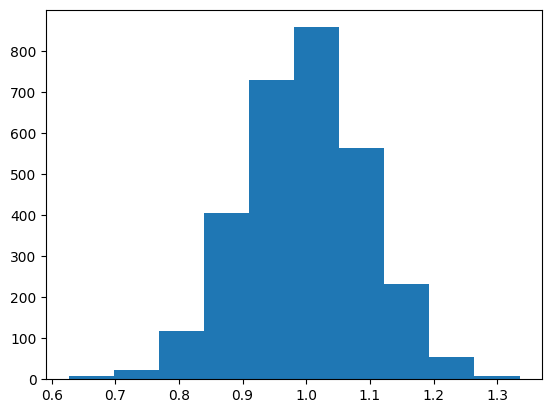

In [106]:
plt.hist(num) 

### random.uniform() 

In [112]:
# random.uniform(low=0.0, high=1.0, size=None) 
# from a uniform distribution 
# drawn from half open interval [low, high) 
a = np.random.uniform(low=0, high = 10, size = (10))
a  

array([8.18958235, 2.33301213, 0.65481737, 8.77215395, 9.26394977,
       2.78887273, 5.95945201, 4.11559464, 0.09826503, 6.9274806 ])

In [117]:
# indexing, Slicing
data = np.array([1, 2, 3])
data[1], data[0:2], data[1:], data[-2:] 

(2, array([1, 2]), array([2, 3]), array([2, 3]))

In [129]:
a = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [0, 4, 2, 1]])
a[a<5], a[a<3],np.nonzero(a[a<3]), a[a%2==0], a[(a<3) & (a%2==0)], (a > 5) | (a == 5)

(array([1, 2, 3, 4, 0, 4, 2, 1]),
 array([1, 2, 0, 2, 1]),
 (array([0, 1, 3, 4], dtype=int64),),
 array([ 2,  4,  6,  8, 10, 12,  0,  4,  2]),
 array([2, 0, 2]),
 array([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [False, False, False, False]]))

In [133]:
# np.nonzero() prints indices of elements satisfying the condition 
a[a<3],np.nonzero(a<3)

(array([1, 2, 0, 2, 1]),
 (array([0, 0, 3, 3, 3], dtype=int64), array([0, 1, 0, 2, 3], dtype=int64)))

### .any() vs all() 

In [137]:
# numpy.any(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)
# Test whether any array element along a given axis evaluates to True.
# Returns single boolean if axis is None
print(a) 
np.any(a), np.all(a) 

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 0  4  2  1]]


(True, False)

In [144]:
# any is OR Gate, .all() is AND Gate 
p = [1,2,3] 
print(np.any(p), np.all(p)) 
p = np.array([0,1,2,3])
print(p) 
print(np.any(p), np.all(p)) 

p1 = p<2 
print(p1) 
print(np.any(p1), np.all(p1)) 

True True
[0 1 2 3]
True False
[ True  True False False]
True False


### broadcasting 

In [146]:
# a means of vectorizing array operations so that 
# looping occurs in C instead of Python

# The simplest broadcasting example occurs 
# when an array and a scalar value are combined in an operation:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b
# the scalar b is stretched to become an array of same shape as a

array([2., 4., 6.])

#### Rules of Broadcasting 

Two dimensions are compatible when

    - they are equal, or
    - one of them is 1.

if not compatible, ValueError is thrown 

The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays

e.g : \
A      (4d array):  8 x 1 x 6 x 1 \
B      (3d array):      7 x 1 x 5 \
Result (4d array):  8 x 7 x 6 x 5

In [147]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a.shape, b.shape 

((4, 3), (3,))

In [148]:
a + b, (a + b).shape

(array([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]]),
 (4, 3))

In [149]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a.shape, b.shape 

((4, 3), (4,))

- trailing dimensions do not match \
      - 3 and 4

When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.

In [152]:
a + b, (a + b).shape
# trailing dimensions, so mismatched 

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 